In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

In [ ]:
import  cv2

In [ ]:
import os
from os import listdir
import matplotlib.pyplot as plt
# from skimage import color
from skimage import io
import glob
# from skimage import color,io
import numpy as np
import matplotlib

In [ ]:
x_train = np.load('/content/drive/My Drive/input_trainning_data.npy')

In [ ]:
y_train=np.load('/content/drive/My Drive/joined_train_label.npy')

In [ ]:
x_test= np.load('/content/drive/My Drive/joined_test_data.npy')

In [ ]:
y_test= np.load('/content/drive/My Drive/joined_test_label.npy')

In [ ]:
# #training set percentage
# trainPercentage = 0.8
# total = x.shape[0]

# dataIndex = np.arange(total)
# np.random.seed(10)
# np.random.shuffle(dataIndex)
# # dataIndex

# #trainSize = 290

In [ ]:
# # The first 296 data are used for training
# trainSize = int(total * trainPercentage)
# trainIndex = dataIndex[0:trainSize]
# x_train = x[trainIndex,:,:,:]

In [ ]:
# testIndex = dataIndex[trainSize:]
# x_test = x[testIndex,:,:,:]

In [ ]:
# y_train = y[0:trainSize]
# y_test = y[trainSize:]

In [ ]:
# import numpy as np
# import os
# import pandas as pd
# from sklearn.metrics import r2_score
# import matplotlib.pyplot as plt
# import time
# import seaborn as sns

# from tensorflow.python.keras.models import Model
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.models import load_model
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras.layers import Conv2D
# from tensorflow.python.keras.layers import MaxPool2D
# from tensorflow.python.keras.layers import Flatten

In [ ]:
import numpy as np
import os
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time
import seaborn as sns



from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

In [ ]:
import tensorflow as tf

In [ ]:
resnet50 = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    input_shape=(224, 224, 3)
)

219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
resnet50.trainable = False

In [ ]:
headModel = resnet50.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
headModel = Dense(7, activation="softmax")(headModel)
model = Model(inputs=resnet50.input, outputs=headModel)



model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
from tensorflow.python.keras.layers import Dropout

In [ ]:
from tensorflow.python.keras.layers import UpSampling2D

In [ ]:
from tensorflow.python import keras

In [ ]:
model = Sequential()
[dataPoints, z1, x1, y1] = x_train.shape
model.add(Conv2D(256, kernel_size=(3,3),activation='relu',input_shape=(z1,x1,y1),padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3),activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(320, kernel_size=(3,3), activation='relu', padding = 'same'))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_203 (Conv2D)         (None, 224, 224, 256)     7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 256)    0         
 2D)                                                             
                                                                 
 conv2d_204 (Conv2D)         (None, 112, 112, 256)     590080    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 256)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 802816)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               2

In [ ]:
pip install git+https://github.com/artemmavrin/focal-loss.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/artemmavrin/focal-loss.git to /tmp/pip-req-build-8brm9r7x
  Running command git clone -q https://github.com/artemmavrin/focal-loss.git /tmp/pip-req-build-8brm9r7x
  Created wheel for focal-loss: filename=focal_loss-0.0.8-py3-none-any.whl size=19050 sha256=09be2842039b20258a08cf3fe13a06b6234155949867099e5ac9b5b1c0e623f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-4hpilmvo/wheels/8b/47/50/038ac80c9238a024e98d68e042f40956e576c005b1e179f7eb
Successfully built focal-loss


In [ ]:
pip install focal-loss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from focal_loss import SparseCategoricalFocalLoss

In [ ]:
model.compile(loss=SparseCategoricalFocalLoss(gamma=2), optimizer='adam', metrics=['accuracy'])

In [ ]:
start = time.time()
history = model.fit(x_train,y_train,epochs=100,batch_size=32,verbose=2,validation_split=0)
end = time.time()
print('total time:',end-start,'s')

Epoch 1/100
251/251 - 27s - loss: 7.3986 - accuracy: 0.5408 - 27s/epoch - 109ms/step
Epoch 2/100
251/251 - 15s - loss: 7.0840 - accuracy: 0.5605 - 15s/epoch - 61ms/step
Epoch 3/100
251/251 - 15s - loss: 6.3635 - accuracy: 0.6052 - 15s/epoch - 61ms/step
Epoch 4/100
251/251 - 15s - loss: 6.2508 - accuracy: 0.6122 - 15s/epoch - 61ms/step
Epoch 5/100
251/251 - 15s - loss: 6.2850 - accuracy: 0.6101 - 15s/epoch - 61ms/step
Epoch 6/100
251/251 - 15s - loss: 6.2649 - accuracy: 0.6113 - 15s/epoch - 61ms/step
Epoch 7/100
251/251 - 15s - loss: 6.3253 - accuracy: 0.6076 - 15s/epoch - 61ms/step
Epoch 8/100
251/251 - 15s - loss: 5.8946 - accuracy: 0.6343 - 15s/epoch - 61ms/step
Epoch 9/100
251/251 - 15s - loss: 5.8020 - accuracy: 0.6400 - 15s/epoch - 61ms/step
Epoch 10/100
251/251 - 15s - loss: 5.8101 - accuracy: 0.6395 - 15s/epoch - 61ms/step
Epoch 11/100
251/251 - 15s - loss: 5.8161 - accuracy: 0.6392 - 15s/epoch - 61ms/step
Epoch 12/100
251/251 - 15s - loss: 5.7940 - accuracy: 0.6405 - 15s/epoch 

Text(0.5, 0, 'epoch')

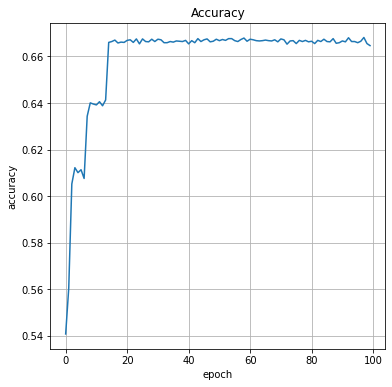

In [ ]:
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (6,6)
#plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_mean_absolute_percentage_error'])
# plt.semilogx(history.history['mean_absolute_percentage_error'])
# plt.semilogx(history.history['val_mean_absolute_percentage_error'])



plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.x
# plt.ylim((0,100))
#plt.legend(['mape', 'val-mape'], loc='upper right')
# plt.savefig('./Figures/Convergence_3/N8_D100_E5000000_L3_C10_log_2.jpg')
# plt.savefig(dirName+'//N8_'+nnType+'_log.jpg')
# plt.show()
#plt.savefig(os.path.join(directory,'Convergence_allPlates.jpg'),dpi=300)

Text(0.5, 0, 'epoch')

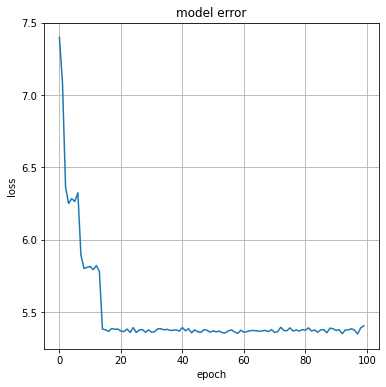

In [ ]:
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (6,6)
plt.plot(history.history['loss'])

#plt.plot(history.history['val_mean_absolute_percentage_error'])
# plt.semilogx(history.history['mean_absolute_percentage_error'])
# plt.semilogx(history.history['val_mean_absolute_percentage_error'])



plt.title('model error')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
# predict probabilities for test set

#yhat_probs=model.predict(x_test)

# predict crisp classes for test set
yhat_probs=model.predict(x_test) 
yhat_classes=np.argmax(yhat_probs,axis=1)
#yhat_classes=model.predict_classes(x_test,verbose=0)

63/63 [==============================] - 1s 22ms/step


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

from sklearn.utils import class_weight

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Accuracy: %f 0.6688279301745635
Confusion matrix, without normalization
[[   0   66    0    0    0    0    0]
 [   0 1341    0    0    0    0    0]
 [   0   23    0    0    0    0    0]
 [   0  220    0    0    0    0    0]
 [   0   29    0    0    0    0    0]
 [   0  103    0    0    0    0    0]
 [   0  223    0    0    0    0    0]]
confusion_matrix: %f [[   0   66    0    0    0    0    0]
 [   0 1341    0    0    0    0    0]
 [   0   23    0    0    0    0    0]
 [   0  220    0    0    0    0    0]
 [   0   29    0    0    0    0    0]
 [   0  103    0    0    0    0    0]
 [   0  223    0    0    0    0    0]]


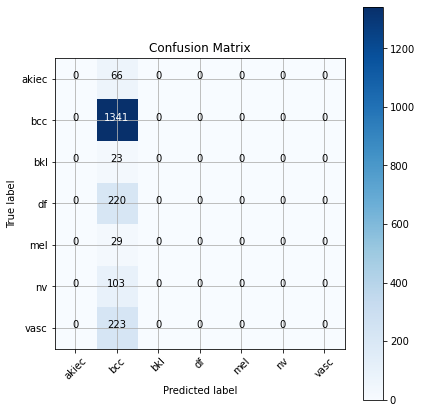

In [ ]:
# accuracy: (tp + tn) / (p + n)
import itertools
accuracy = accuracy_score(y_test, yhat_classes)



print('Accuracy: %f',accuracy)



# precision tp / (tp + fp)



# precision = precision_score(y_test, yhat_classes)



# print('Precision: %f' % precision)



# recall: tp / (tp + fn)



# recall = recall_score(y_test, yhat_classes)



# print('Recall: %f' % recall)



# f1: 2 tp / (2 tp + fp + fn)
#confusion_matrix
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']
f1 = confusion_matrix(y_test, yhat_classes)
plot_confusion_matrix(f1, cm_plot_labels, title='Confusion Matrix')



print('confusion_matrix: %f',f1)

In [ ]:
# predict probabilities for test set

yhat_probs=model.predict(x_train)

yhat_classes=np.argmax(yhat_probs,axis=1)

# predict crisp classes for test set

# yhat_classes=model.predict_classes(x_train)

251/251 [==============================] - 6s 22ms/step


Accuracy: %f 0.6696216756149332
Confusion matrix, without normalization
[[   0  261    0    0    0    0    0]
 [   0 5363    0    0    0    0    0]
 [   0   92    0    0    0    0    0]
 [   0  879    0    0    0    0    0]
 [   0  113    0    0    0    0    0]
 [   0  411    0    0    0    0    0]
 [   0  890    0    0    0    0    0]]
confusion_matrix: %f [[   0  261    0    0    0    0    0]
 [   0 5363    0    0    0    0    0]
 [   0   92    0    0    0    0    0]
 [   0  879    0    0    0    0    0]
 [   0  113    0    0    0    0    0]
 [   0  411    0    0    0    0    0]
 [   0  890    0    0    0    0    0]]


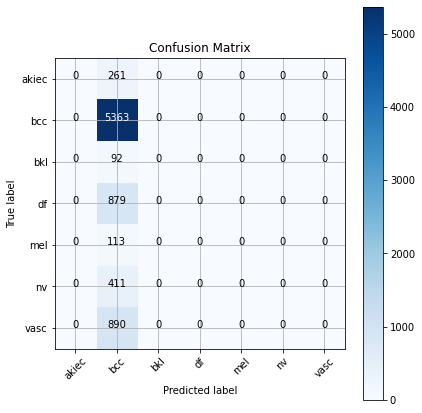

In [ ]:
# accuracy: (tp + tn) / (p + n)
import itertools
accuracy = accuracy_score(y_train, yhat_classes)



print('Accuracy: %f',accuracy)



# precision tp / (tp + fp)



# precision = precision_score(y_test, yhat_classes)



# print('Precision: %f' % precision)



# recall: tp / (tp + fn)



# recall = recall_score(y_test, yhat_classes)



# print('Recall: %f' % recall)



# f1: 2 tp / (2 tp + fp + fn)
#confusion_matrix
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']
f1 = confusion_matrix(y_train, yhat_classes)
plot_confusion_matrix(f1, cm_plot_labels, title='Confusion Matrix')



print('confusion_matrix: %f',f1)